In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')


Load The DataSet

In [ ]:
import os

# List all files in current Colab directory
for file in os.listdir('/content/drive/MyDrive/archive'):
    print(file)


TESS Toronto emotional speech set data


In [ ]:
!file /content/archive.zip


/content/archive.zip: cannot open `/content/archive.zip' (No such file or directory)


In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2642

In [ ]:
paths[:5]

['/content/drive/MyDrive/archive/TESS Toronto emotional speech set data/YAF_disgust/YAF_boat_disgust.wav',
 '/content/drive/MyDrive/archive/TESS Toronto emotional speech set data/YAF_disgust/YAF_chalk_disgust.wav',
 '/content/drive/MyDrive/archive/TESS Toronto emotional speech set data/YAF_disgust/YAF_goal_disgust.wav',
 '/content/drive/MyDrive/archive/TESS Toronto emotional speech set data/YAF_disgust/YAF_chair_disgust.wav',
 '/content/drive/MyDrive/archive/TESS Toronto emotional speech set data/YAF_disgust/YAF_door_disgust.wav']

In [ ]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
1,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
2,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
3,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
4,/content/drive/MyDrive/archive/TESS Toronto em...,disgust


In [ ]:
# Option 1: Drop rows with label == 'ps (1)'
df = df[df['label'] != 'ps (1)']

# Option 2 (if you want to merge it into 'ps'):
df['label'] = df['label'].replace('ps (1)', 'ps')


In [ ]:
df['label'].value_counts()

,count
label,
disgust,385
angry,385
fear,381
ps,370
sad,370
neutral,369
happy,369


Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

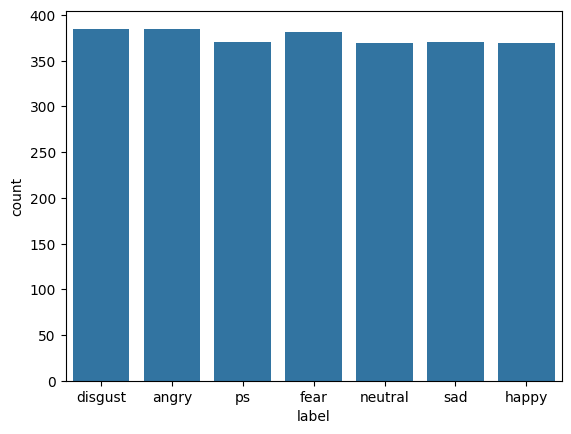

In [ ]:
sns.countplot(data=df, x='label')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

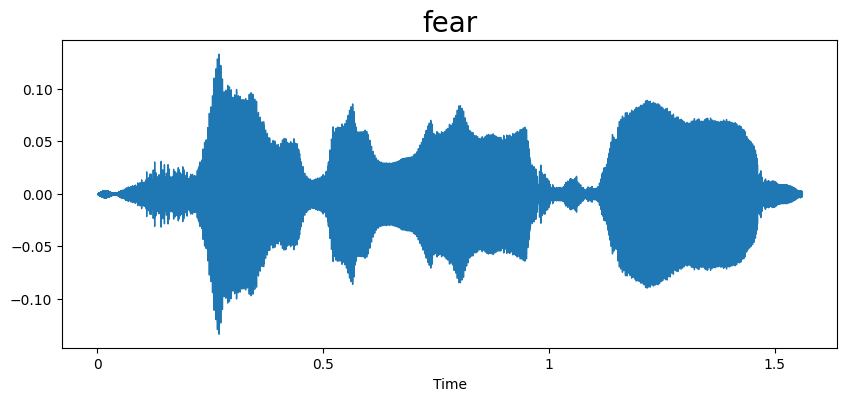

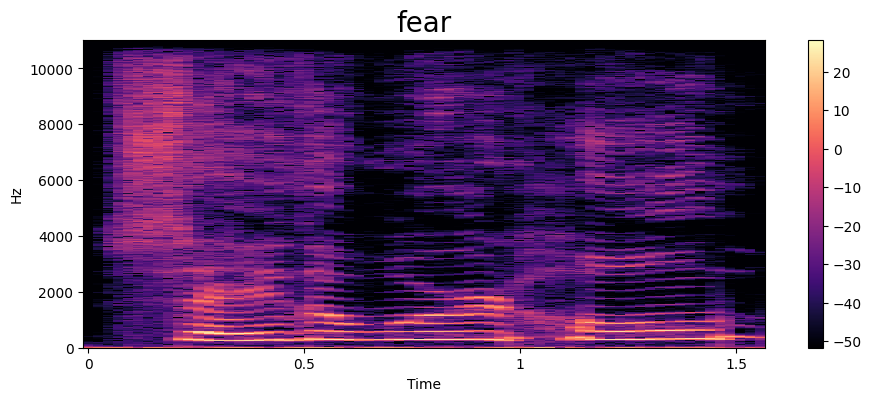

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

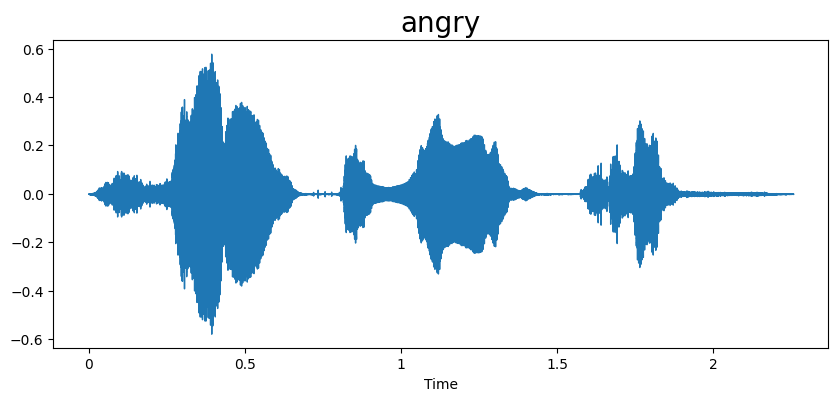

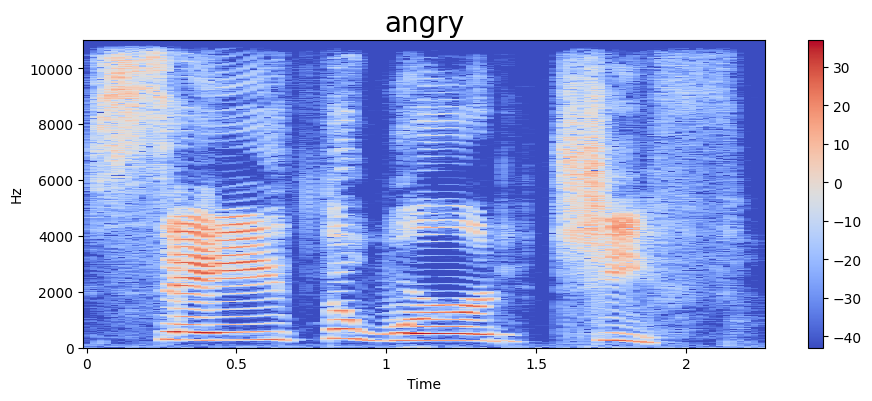

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

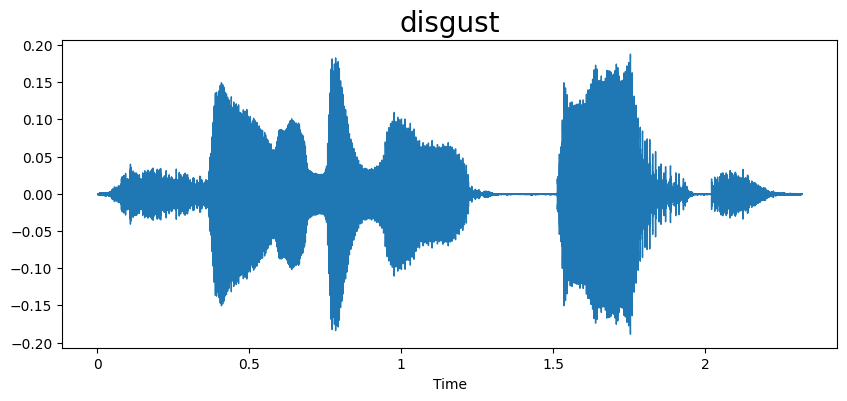

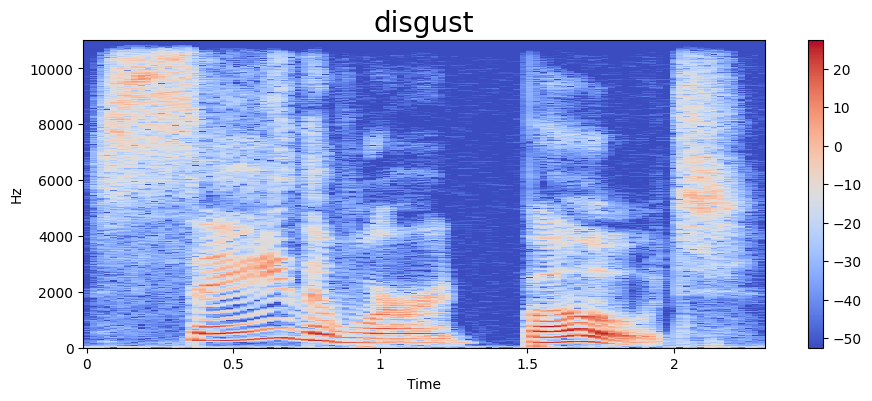

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

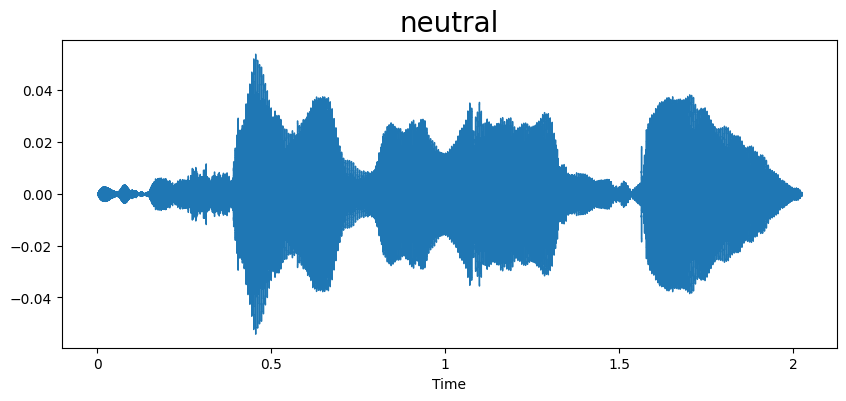

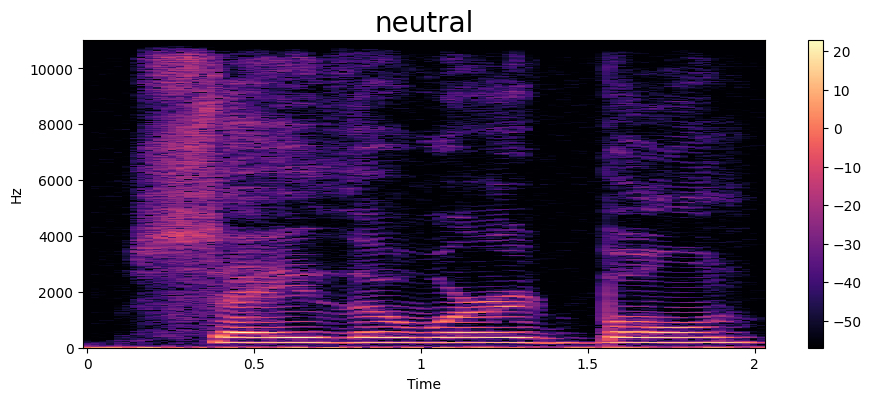

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

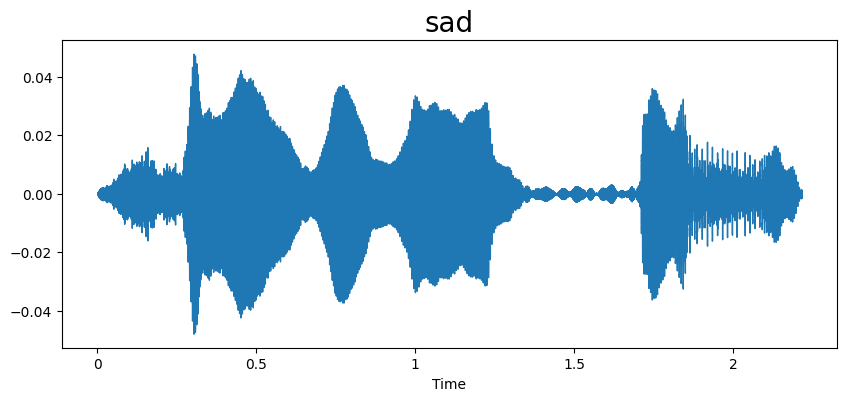

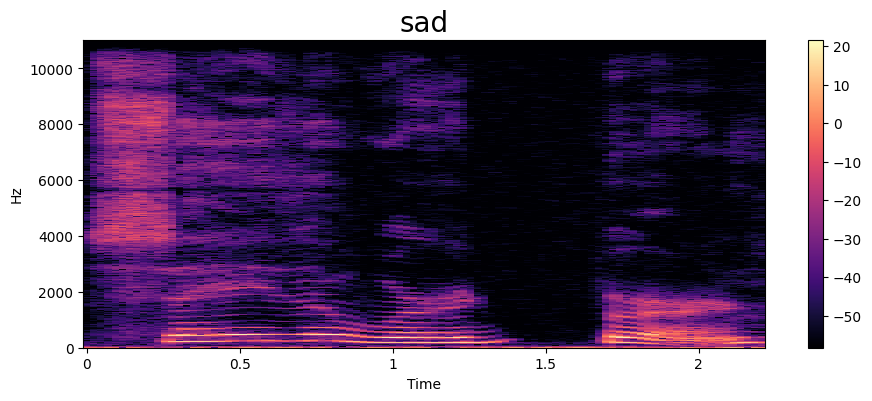

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

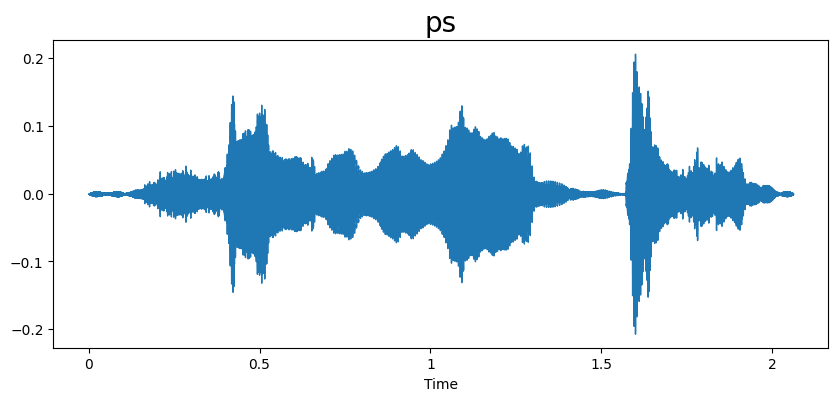

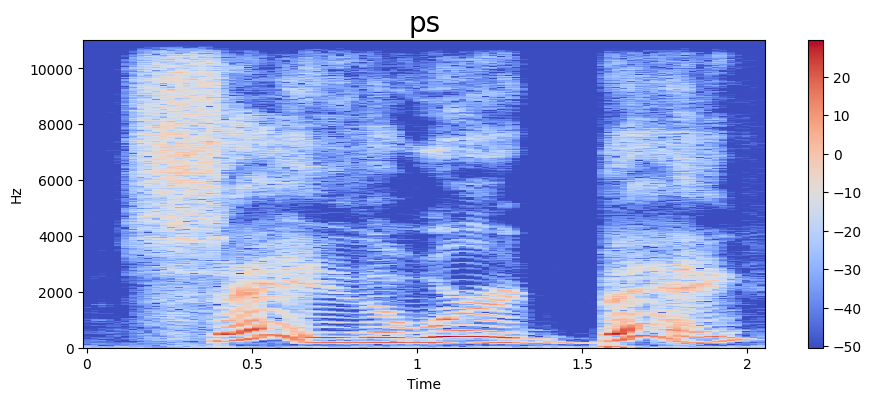

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


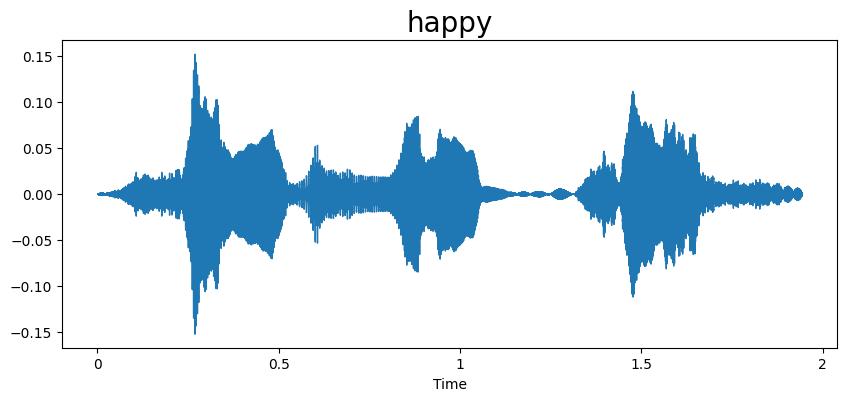

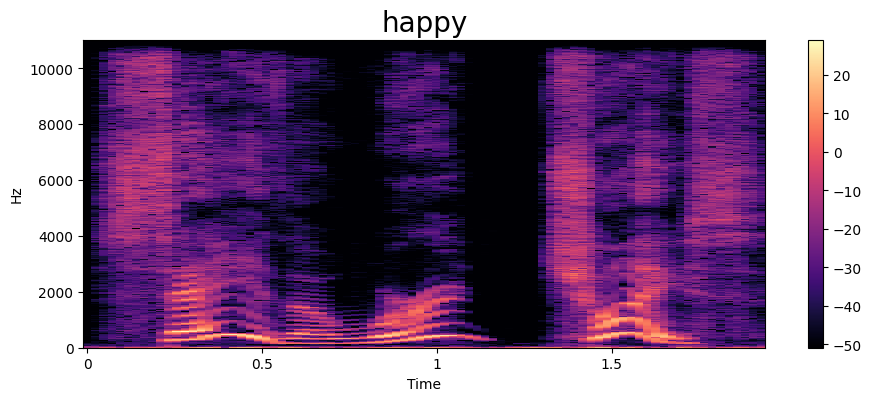

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.2064407e+02,  9.7250923e+01, -5.8227611e-01,  1.7940107e+01,
       -1.3912266e+01, -4.5460105e+00, -6.7650805e+00, -9.0733843e+00,
       -9.1889467e+00, -4.0450530e+00, -1.1367815e+01,  2.8339434e+00,
       -2.0045788e+00,  1.2298646e+00, -1.7541523e+00, -6.5558558e+00,
       -4.2858906e+00,  3.0584717e+00, -4.4824128e+00, -1.8189454e+00,
        2.5101686e+00,  5.7593167e-01, -3.4616082e+00,  4.8974862e+00,
       -2.1020253e+00,  2.4044790e+00, -4.5513144e-01,  1.8465832e+00,
       -1.4152130e+00,  2.1161497e+00, -4.8162432e+00,  5.6674824e+00,
        1.5131889e-01,  2.0916786e+00,  3.0895705e+00,  2.3847067e+00,
        5.2863426e+00,  3.7488871e+00,  3.5173142e+00,  4.8316412e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

,speech
0,"[-420.64407, 97.25092, -0.5822761, 17.940107, ..."
1,"[-393.1834, 94.98189, -7.0858984, 14.454968, -..."
2,"[-407.32117, 115.994644, -1.4443316, 10.601313..."
3,"[-377.21838, 96.17767, -19.67383, 13.105586, -..."
4,"[-430.4275, 118.75985, 6.965281, 5.2049294, -8..."
...,...
2637,"[-353.41275, 61.72033, -13.536858, 28.868282, ..."
2638,"[-322.72653, 48.806816, -15.4125, 15.4176855, ..."
2639,"[-326.55713, 54.930847, -21.872318, 27.639528,..."
2640,"[-321.65933, 45.25998, -19.181534, 18.879175, ..."


In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2629, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2629, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2629, 7)

Create the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.layers import Dropout
model.add(Dropout(0.5))


In [ ]:
from keras.regularizers import l2
Dense(64, activation='relu', kernel_regularizer=l2(0.001))


<Dense name=dense_3, built=False>

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.2603 - loss: nan - val_accuracy: 0.2186 - val_loss: 2.5169
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.3984 - loss: nan - val_accuracy: 0.3099 - val_loss: 3.5408
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.4272 - loss: nan - val_accuracy: 0.4106 - val_loss: 3.2511
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - accuracy: 0.4740 - loss: nan - val_accuracy: 0.3612 - val_loss: 2.5058
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 234ms/step - accuracy: 0.4683 - loss: nan - val_accuracy: 0.4639 - val_loss: 2.1353
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 170ms/step - accuracy: 0.4659 - loss: nan - val_accuracy: 0.4791 - val_loss: 3.0640
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - accuracy: 0.4800 - loss: nan - val_accuracy: 0.6065 - val_loss: 3.4381
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.4730 - loss: nan - val_accuracy: 0.3631 - val_loss: 2

Plot the results

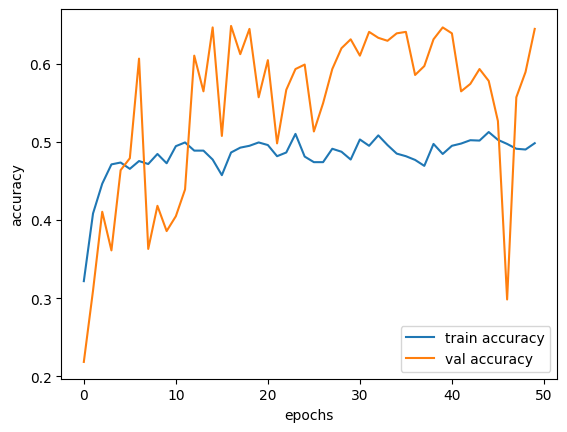

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


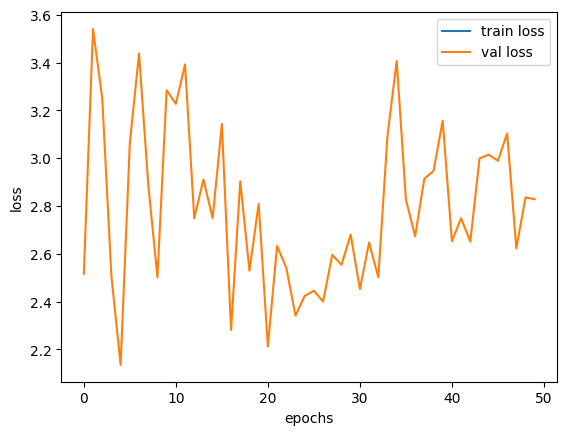

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
df[['speech', 'label']].head(10)


,speech,label
0,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
1,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
2,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
3,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
4,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
5,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
6,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
7,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
8,/content/drive/MyDrive/archive/TESS Toronto em...,disgust
9,/content/drive/MyDrive/archive/TESS Toronto em...,disgust


In [ ]:
import numpy as np
X_test = np.array([extract_mfcc(file) for file in df['speech']])
X_test = np.expand_dims(X_test, -1)

predictions = model.predict(X_test)

predicted_labels = enc.inverse_transform(predictions)

df['predicted_label'] = [label[0] for label in predicted_labels]

print(df[['speech', 'label', 'predicted_label']].head(800))


83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step
                                                speech    label  \
0    /content/drive/MyDrive/archive/TESS Toronto em...  disgust   
1    /content/drive/MyDrive/archive/TESS Toronto em...  disgust   
2    /content/drive/MyDrive/archive/TESS Toronto em...  disgust   
3    /content/drive/MyDrive/archive/TESS Toronto em...  disgust   
4    /content/drive/MyDrive/archive/TESS Toronto em...  disgust   
..                                                 ...      ...   
799  /content/drive/MyDrive/archive/TESS Toronto em...     fear   
800  /content/drive/MyDrive/archive/TESS Toronto em...     fear   
801  /content/drive/MyDrive/archive/TESS Toronto em...     fear   
802  /content/drive/MyDrive/archive/TESS Toronto em...     fear   
803  /content/drive/MyDrive/archive/TESS Toronto em...     fear   

    predicted_label  
0           disgust  
1           disgust  
2           disgust  
3           disgust  
4           disgust  
..              ...  
7

In [ ]:
from sklearn.metrics import accuracy_score

actual_labels = df['label'].values
accuracy = accuracy_score(actual_labels, df['predicted_label'])
print(f"Overall Prediction Accuracy: {accuracy:.2f}")


Overall Prediction Accuracy: 0.91


In [ ]:
model.evaluate(X, y)


83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9805 - loss: 0.0910


[0.6136565804481506, 0.9136554002761841]